#### Notebook to process the ECG images

In [1]:
import os
import cv2
import random
from matplotlib import pyplot as plt

number of abnormal ecg images = 233 
number of normal ecg images = 284


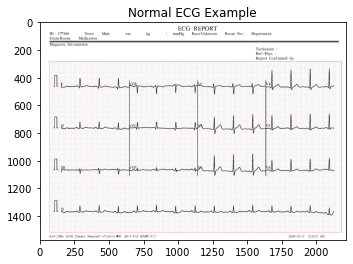

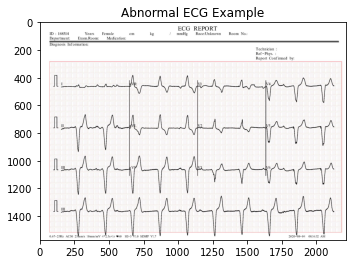

In [5]:
files_norm = os.listdir('./ecg_normal_orig')
files_abnorm = os.listdir('./ecg_abnormal_orig')

len_abnorm = len(files_abnorm)
len_norm = len(files_norm)

print(f'number of abnormal ecg images = {len_abnorm} \nnumber of normal ecg images = {len_norm}') 

# display example images
# normal ECG image
image = random.choice(files_norm)
image = os.path.join('./ecg_normal_orig', image)

image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Normal ECG Example')
plt.show()

# abnormal ECG image
image = random.choice(files_abnorm)
image = os.path.join('./ecg_abnormal_orig', image)

image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Abnormal ECG Example')
plt.show()

In [6]:
# rename abnormal
# uncomment to use after transferring images for the first time

files = os.listdir('./ecg_abnormal_orig')

for i, j in enumerate(files, start=1):
    if j == '.ipynb_checkpoints':
        continue
    old_path = os.path.join('./ecg_abnormal_orig', j)
    new_path = os.path.join('./ecg_abnormal_orig', f'abnormal-{i}.jpg')
    os.rename(old_path, new_path)

In [7]:
# rename normal
# uncomment to use after transferring images for the first time

files = os.listdir('./ecg_normal_orig')

for i, j in enumerate(files, start=1):
    if j == '.ipynb_checkpoints':
        continue
    old_path = os.path.join('./ecg_normal_orig', j)
    new_path = os.path.join('./ecg_normal_orig', f'normal-{i}.jpg')
    os.rename(old_path, new_path)

##### Before running the next cells, create a copy of the normal original images and abnormal original images into "ecg_normal" and "ecg_abnormal"

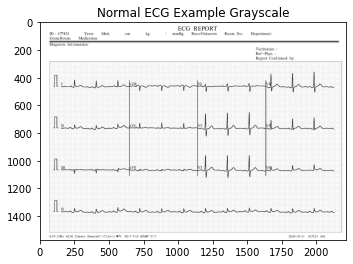

In [9]:
# Convert the normal images to grayscale
files_norm = os.listdir('./ecg_normal')

# normal
for _, j in enumerate(files_norm):
    path = os.path.join('./ecg_normal', j)
    img = cv2.imread(path)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(path, img)
    
# display example
img = random.choice(files_norm)
img = os.path.join('./ecg_normal', img)

img = cv2.imread(img)
plt.imshow(img)
plt.title('Normal ECG Example Grayscale')
plt.show()

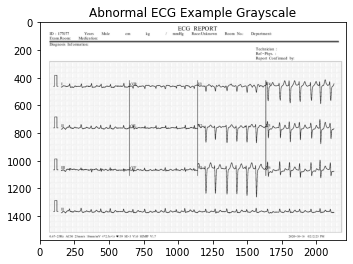

In [11]:
# Convert the abnormal images to grayscale
files_abnorm = os.listdir('./ecg_abnormal')

# abnormal
for _, j in enumerate(files_abnorm):
    path = os.path.join('./ecg_abnormal', j)
    img = cv2.imread(path)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(path, img)
    
# display example
img = random.choice(files_abnorm)
img = os.path.join('./ecg_abnormal', img)

img = cv2.imread(img)
plt.imshow(img)
plt.title('Abnormal ECG Example Grayscale')
plt.show()

Again, copy from ecg_normal to ecg_normal thresh, and ecg_abnormal to ecg_abnormal_thresh

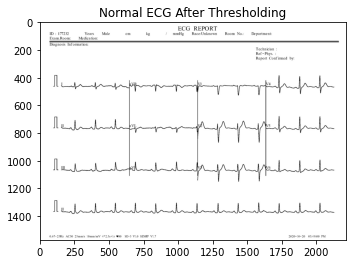

In [13]:
# Thresholding the images to get rid of the background
files_norm = os.listdir('./ecg_normal_thresh')

# normal
for _, j in enumerate(files_norm):
    path = os.path.join('./ecg_normal_thresh', j)
    img = cv2.imread(path)

    _, img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
    cv2.imwrite(path, img)
    
# display example
img = random.choice(files_norm)
img = os.path.join('./ecg_normal_thresh', img)

img = cv2.imread(img)
plt.imshow(img)
plt.title('Normal ECG After Thresholding')
plt.show()

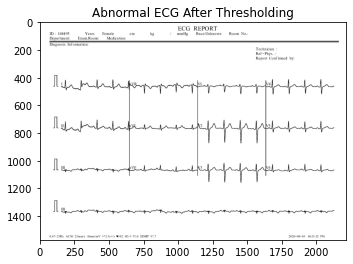

In [14]:
# Thresholding the images to get rid of the background
files_abnorm = os.listdir('./ecg_abnormal_thresh')

# normal
for _, j in enumerate(files_abnorm):
    path = os.path.join('./ecg_abnormal_thresh', j)
    img = cv2.imread(path)

    _, img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
    cv2.imwrite(path, img)
    
# display example
img = random.choice(files_abnorm)
img = os.path.join('./ecg_abnormal_thresh', img)

img = cv2.imread(img)
plt.imshow(img)
plt.title('Abnormal ECG After Thresholding')
plt.show()

In [15]:
# Cropping normal images

import os
import re
import cv2
import matplotlib.pyplot as plt

def Convert_Image_Lead(image_file, input_folder, output_folder):
    # Read the image using OpenCV
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # cv2.IMREAD_GRAYSCALE to ensure it's in grayscale if needed
    
    # Dividing the ECG leads from 1-12
    Leads = [
        image[300:600, 150:643], image[300:600, 646:1135], image[300:600, 1140:1626],
        image[300:600, 1630:2125], image[600:900, 150:643], image[600:900, 646:1135],
        image[600:900, 1140:1626], image[600:900, 1630:2125], image[900:1200, 150:643],
        image[900:1200, 646:1135], image[900:1200, 1140:1626], image[900:1200, 1630:2125]
    ]
    
    # Creating a folder for the current image leads if it doesn't exist
    folder_name = re.sub('.jpg', '', image_file)
    output_path = os.path.join(output_folder, folder_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    # Loop through leads and save each image directly using cv2
    for x, lead_image in enumerate(Leads):
        lead_path = os.path.join(output_path, f"lead-{x+1}.png")
        cv2.imwrite(lead_path, lead_image)

# Specifying the input and output directories
input_folder = './ecg_normal_thresh'
output_folder = './ecg_normal_cropped'

# Processing all images in the input directory
for image_file in os.listdir(input_folder):
    if image_file.endswith('.jpg'):  # Ensuring only .jpg files are processed
        Convert_Image_Lead(image_file, input_folder, output_folder)


In [16]:
# Cropping abnormal images

import os
import re
import cv2
import matplotlib.pyplot as plt

def Convert_Image_Lead(image_file, input_folder, output_folder):
    # Read the image using OpenCV
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # cv2.IMREAD_GRAYSCALE to ensure it's in grayscale if needed
    
    # Dividing the ECG leads from 1-12
    Leads = [
        image[300:600, 150:643], image[300:600, 646:1135], image[300:600, 1140:1626],
        image[300:600, 1630:2125], image[600:900, 150:643], image[600:900, 646:1135],
        image[600:900, 1140:1626], image[600:900, 1630:2125], image[900:1200, 150:643],
        image[900:1200, 646:1135], image[900:1200, 1140:1626], image[900:1200, 1630:2125]
    ]
    
    # Creating a folder for the current image leads if it doesn't exist
    folder_name = re.sub('.jpg', '', image_file)
    output_path = os.path.join(output_folder, folder_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    # Loop through leads and save each image directly using cv2
    for x, lead_image in enumerate(Leads):
        lead_path = os.path.join(output_path, f"lead-{x+1}.png")
        cv2.imwrite(lead_path, lead_image)

# Specifying the input and output directories
input_folder = './ecg_abnormal_thresh'
output_folder = './ecg_abnormal_cropped'

# Processing all images in the input directory
for image_file in os.listdir(input_folder):
    if image_file.endswith('.jpg'):  # Ensuring only .jpg files are processed
        Convert_Image_Lead(image_file, input_folder, output_folder)
